In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
%matplotlib inline

In [2]:
def renameOrderResidues(file_input):
    rename_dict = {}
    acid_list = []
    base_list = []
    polar_rest_list = []
    ub_q_list = []
    non_residue_list = []

    for i in file_input.columns[:-1]:
        residue_number = i[4:8]
        if residue_number.isdigit():  # Check if the substring is numeric
            rename_dict[i] = i[3] + "_" + i[:3] + str(int(residue_number))
        else:
            rename_dict[i] = i[3] + "_" + i[:3] + residue_number

    rename_dict["Count"] = 'Count'

    for x, y in rename_dict.items():
        if y[2:5] == 'ASP':
            rename_dict[x] = y[:1] + 'D' + y[5:]
            acid_list.append(y[:1] + 'D' + y[5:])
        if y[2:5] == 'GLU':
            rename_dict[x] = y[:1] + 'E' + y[5:]
            acid_list.append(y[:1] + 'E' + y[5:])
        if y[2:5] == 'ARG':
            rename_dict[x] = y[:1] + 'R' + y[5:]
            base_list.append(y[:1] + 'R' + y[5:])
        if y[2:5] == 'HIS':
            rename_dict[x] = y[:1] + 'H' + y[5:]
            base_list.append(y[:1] + 'H' + y[5:])
        if y[2:5] == 'LYS':
            rename_dict[x] = y[:1] + 'K' + y[5:]
            base_list.append(y[:1] + 'K' + y[5:])
        if y[2:5] == 'TYR':
            rename_dict[x] = y[:1] + 'Y' + y[5:]
            polar_rest_list.append(y[:1] + 'Y' + y[5:])
        if y[2:5] == 'CYS':
            rename_dict[x] = y[:1] + 'C' + y[5:]
            polar_rest_list.append(y[:1] + 'C' + y[5:])
        if y[2:5] == 'PL9':
            rename_dict[x] = 'MQ8' + y[5:]
            ub_q_list.append('MQ8' + y[5:])
        if y == 'Count':
            non_residue_list.append(y)

    col_order_list = acid_list + polar_rest_list + base_list + ub_q_list + non_residue_list
    file_input = file_input.rename(rename_dict, axis=1)
    file_input = file_input[col_order_list]
    return file_input

In [3]:
df_csv = pd.read_csv("NDH-1_CL4.csv")
df_csv

,GLUN0226_,GLUN0173_,ASPO0085_,LYSN0253_,GLUO0087_,Count
0,-1.0,0.0,-1.0,1.0,0.0,4950954
1,0.0,-1.0,-1.0,1.0,0.0,522342
2,-1.0,0.0,0.0,1.0,0.0,96232
3,0.0,0.0,-1.0,1.0,0.0,64548
4,0.0,-1.0,0.0,1.0,0.0,28800
5,-1.0,-1.0,0.0,1.0,0.0,18814
6,-1.0,-1.0,-1.0,1.0,0.0,18299
7,0.0,0.0,0.0,0.0,1.0,11


In [4]:
#importing the weighted correlation script and obatain the weighted correlation score value.
import weighted_correlation as wc
df_correlation= wc.WeightedCorr(df=renameOrderResidues(df_csv), wcol='Count')(method='pearson')
df_correlation

,NE226,NE173,OD85,OE87,NK253
NE226,1.000000,-0.905880,0.047825,0.003992,-0.003992
NE173,-0.905880,1.000000,-0.120476,0.000471,-0.000471
OD85,0.047825,-0.120476,1.000000,0.008633,-0.008633
OE87,0.003992,0.000471,0.008633,1.000000,-1.000000
NK253,-0.003992,-0.000471,-0.008633,-1.000000,1.000000


In [5]:
##df = renameOrderResidues(df_choose_res_data2)

df = renameOrderResidues(df_csv)
df

,NE226,NE173,OD85,OE87,NK253,Count
0,-1.0,0.0,-1.0,0.0,1.0,4950954
1,0.0,-1.0,-1.0,0.0,1.0,522342
2,-1.0,0.0,0.0,0.0,1.0,96232
3,0.0,0.0,-1.0,0.0,1.0,64548
4,0.0,-1.0,0.0,0.0,1.0,28800
5,-1.0,-1.0,0.0,0.0,1.0,18814
6,-1.0,-1.0,-1.0,0.0,1.0,18299
7,0.0,0.0,0.0,1.0,0.0,11


In [6]:
#importing the weighted correlation script and obatain the weighted correlation score value.
import weighted_correlation as wc
df_correlation= wc.WeightedCorr(df=renameOrderResidues(df_csv), wcol='Count')(method='pearson')
df_correlation

,NE226,NE173,OD85,OE87,NK253
NE226,1.000000,-0.905880,0.047825,0.003992,-0.003992
NE173,-0.905880,1.000000,-0.120476,0.000471,-0.000471
OD85,0.047825,-0.120476,1.000000,0.008633,-0.008633
OE87,0.003992,0.000471,0.008633,1.000000,-1.000000
NK253,-0.003992,-0.000471,-0.008633,-1.000000,1.000000


In [7]:
# drop the residues if any of the correlation value is not greater than 0.1 except that residues.
def dropCorrCriterion(data_frame, cutoff = None):
    if not cutoff:
        cutoff = 0.0
    for i in data_frame.columns:
        if list(abs(data_frame[i]) >= cutoff).count(True) == 1:
            data_frame.drop(i, inplace = True)
            data_frame.drop(i, axis =1, inplace = True)
    return data_frame

In [8]:
df_corr_drop = dropCorrCriterion(df_correlation)
df_corr_drop

,NE226,NE173,OD85,OE87,NK253
NE226,1.000000,-0.905880,0.047825,0.003992,-0.003992
NE173,-0.905880,1.000000,-0.120476,0.000471,-0.000471
OD85,0.047825,-0.120476,1.000000,0.008633,-0.008633
OE87,0.003992,0.000471,0.008633,1.000000,-1.000000
NK253,-0.003992,-0.000471,-0.008633,-1.000000,1.000000


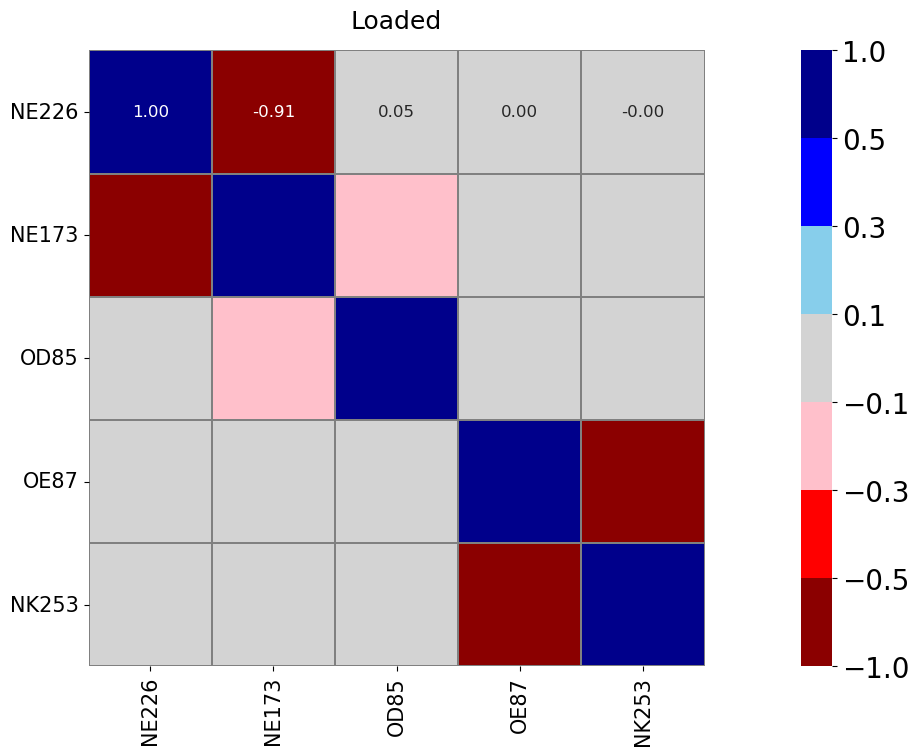

In [9]:
# plot the heatmap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap,ListedColormap,BoundaryNorm
plt.figure(figsize=(25, 8))
cmap = ListedColormap(["darkred", "red", "pink", "lightgray","skyblue", "blue", 'darkblue'])
bounds= [-1.0, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1.0]
norm =BoundaryNorm(bounds, cmap.N)
heatmap = sns.heatmap(df_correlation, annot=True, linecolor= "gray", cmap=cmap, norm = norm, square = True, fmt=".2f",linewidths=.01,annot_kws={"fontsize":12})#cbar_kws= {"orientation": "horizontal", "shrink": 1})
heatmap.set_title('Loaded', fontdict={'fontsize':18}, pad=16)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize = 15, rotation = 0)
plt.xticks(fontsize = 15, rotation = 90)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
plt.savefig("NDH_corr.pdf", dpi = 600, bbox_inches = 'tight');